1. Генеруємо дані (x,y) навколо прямої y=9x+11

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = 9
b = 11

x = np.random.normal(5, 2, 500)
y = k*x+b + np.random.normal(5, 15, 500)
data = pd.DataFrame({'X': x, 'Y': y})

2. Візуалізуємо дані

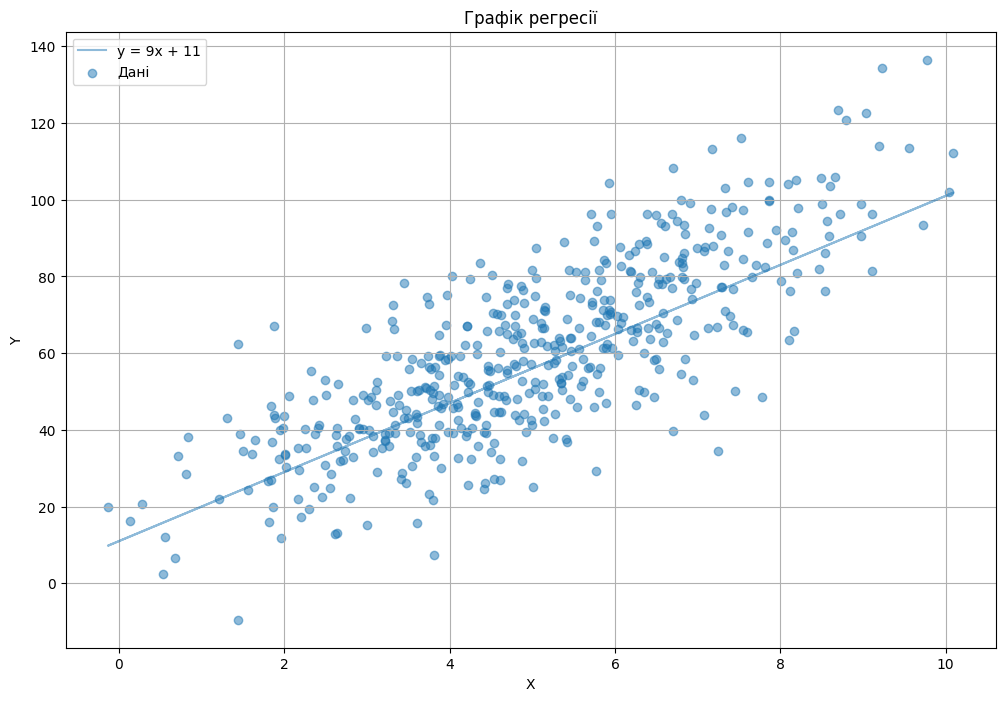

In [112]:
plt.figure(figsize=(12, 8))
plt.plot(x, k*x+b, alpha=0.5, label=f'y = {k}x + {b}')
plt.scatter(data.X, data.Y, alpha=0.5, label='Дані')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графік регресії')
plt.grid(True)

plt.show()

3. МНК

In [123]:
def sqmeth(x, y):
    x_mean = sum(x) / len(x)
    y_mean = sum(y) / len(y)

    S_xy = sum((xi - x_mean) * (yi - y_mean) for xi, yi in zip(x, y))
    S_xx = sum((xi - x_mean) ** 2 for xi in x)


    k = S_xy / S_xx
    b = y_mean - k * x_mean

    return k, b

k_LSM, b_LSM = sqmeth(data.X, data.Y)
print(f"Оптимальна оцінка k (LSM): {k_LSM}")
print(f"Оптимальна оцінка b (LSM): {b_LSM}")

k_POLY, b_POLY = np.polyfit(data.X, data.Y, 1)
print(f"Оптимальна оцінка k (POLY): {k_POLY}")
print(f"Оптимальна оцінка b (POLY): {b_POLY}")

Оптимальна оцінка k (LSM): 9.574566314416176
Оптимальна оцінка b (LSM): 12.025178053471585
Оптимальна оцінка k (POLY): 9.574566314416181
Оптимальна оцінка b (POLY): 12.025178053471555
